# Market Research for a New Video Game Company

### **Introduction and Motivation:**

Market research is extremely important, especially for any aspiring market entrant be it a startup, or an established company venturing into a new product/market. Releasing a new product is an extremely risky business, for example data shows that there is [almost 95% of new products end up failing](https://www.inc.com/marc-emmer/95-percent-of-new-products-fail-here-are-6-steps-to-make-sure-yours-dont.html). Thus it is extremely important to understand the market which any industry is entering, and market research encompasses everything from market sizing and competitor analysis to yearly trends. For our project, we conducted the preliminary market research for a startup which is aiming to enter the video game industry, and wants to understand what platform, genre, and region would maximize its revenue. For this purpose, we will use a publicly available dataset that looks at every single video game that has sold >100,000 copies released between 1977 (when the first home video game was released) and 2016.  


Our goal is helping our startup client to **analyze the sales of video games** to see various trends related to video game genre, publisher, platform, and release year across different regions (North America, Japan, and rest of the world). We will benchmark our data analysis on a challenging large-scale dataset which allows us to **explore the varying trends in consumer preferences in the > 200 billion USD global video game industry, and provide advice for a startup company aiming to enter the market in 2017.** 


(Note: Our dataset is from 1977 to 2016. Even though it is not an updated dataset, there are still many insights for us to explore. So within this project only, we pretend that the current time is 2016 and help our client forecast the future video game market in 2017.)

By diving deep into the dataset, we discovered various trends and correlations among game genres, publishers, platforms, release years, sales, etc., across different regions (Europe, North America, Japan, and the rest of the world). We integrated these findings and came to specific conclusions on how to release new games in North America and Japan.

### **Summary Report**

This research identified different trends the video games market has gone through over the years. In order to enter the highly competitive market globally and in North America , a company must focus on the ‘Shooter’ genre on the PS4 since it has the highest average sales per title, and is projected to have the highest market share in the coming years.  However, if the entrant wishes to focus on the Japanese Market, they should work on a ‘Role Playing Game’  on the Nintendo DS. However, it might be better to focus on the NA market as it has the highest share of video games sales globally.

**Dashboards:**
* **Tableau (Two sheets)**: https://public.tableau.com/app/profile/yu.ting.hung/viz/B07-Market-Rearch-For-A-New-Video-Game-Company/GlobalSalesMarketResearch?publish=yes
* **Data Studio (Six sheets)**: https://datastudio.google.com/reporting/b395599f-3f1c-464a-a6d1-83ef671177ed

### **Content**

1. Data Source 
2. Data Cleaning  - Other Columns Missing 
3. Summary Statistics
4. Q1: Global overview of the Video Game Market 
5. Q2: Deep dive into game Genres and Platforms
6. Q3: Best game market to invest in
7. Suggestions
8. Conclusion
9. Resource

### **1. Data Source**

The raw data provided by VGChartz [(Dataset Kaggle Link)](https://www.kaggle.com/datasets/gregorut/videogamesales). "VGChartz is a video game sales tracking website, providing weekly sales figures of console software and hardware by region." from [Wikipedia](https://en.wikipedia.org/wiki/VGChartz).

The dataset was last updated six years ago. It has 16,598 records of games that have more than 100,000 copies sold globally. There are 11 columns in the table, as indicated below:

**Fields in the dataset:**
* Rank - Ranking by overall sales
* Name - Game title
* Platform – The platform on which the game is released (i.e., PC, PS4, etc.)
* Year - Year released
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales – The number of copies sold in North America (in millions)
* EU_Sales – The number of copies sold in Europe (in millions)
* JP_Sales - The number of copies sold in Japan (in millions)
* Other_Sales - The number of copies sold in the rest of the world (in millions)
* Global_Sales - The total number of copies sold globally

**1.1 A brief overview of the dataset by looking at the top 10 rows**

In [17]:
%%bigquery
SELECT * FROM `ba775-b7.vgsales.vgsales` LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  5.01rows/s]


Rank                                          Name Platform  Year  \
0   638                               Sonic Adventure       DC  1998   
1   961                                    Crazy Taxi       DC  2000   
2  1679                                        NFL 2K       DC  1999   
3  1711                                       Shenmue       DC  1999   
4  1795                Resident Evil - Code: Veronica       DC  2000   
5  1879                                       NFL 2K1       DC  2000   
6     7                         New Super Mario Bros.       DS  2006   
7    11                                    Nintendogs       DS  2005   
8    12                                 Mario Kart DS       DS  2005   
9    20  Brain Age: Train Your Brain in Minutes a Day       DS  2005   

        Genre          Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0    Platform               Sega      1.26      0.61      0.46         0.08   
1      Racing               Sega      1.10      0.51      0.12         0.08   
2      Sports               Sega      1.12      0.05      0.00         0.02   
3   Adventure               Sega      0.52      0.24      0.38         0.04   
4      Action  Eidos Interactive      0.41      0.23      0.47         0.03   
5      Sports               Sega      1.02      0.05      0.00         0.02   
6    Platform           Nintendo     11.38      9.23      6.50         2.90   
7  Simulation           Nintendo      9.07     11.00      1.93         2.75   
8      Racing           Nintendo      9.81      7.57      4.13         1.92   
9        Misc           Nintendo      4.75      9.26      4.16         2.05   

   Global_Sales  
0          2.42  
1          1.81  
2          1.20  
3          1.18  
4          1.14  
5          1.09  
6         30.01  
7         24.76  
8         23.42  
9         20.22

### **2. Data Cleaning**

We found 271 rows with missing values of "Year" and 260 rows with "Unknown" or "N/A" publishers, so we devoted ourselves to filling in those missing values with public online information so we could conduct a more profound analysis based on time-series data. We kept the raw data `ba775-b7.vgsales.vgsales` as a backup record for reference, and created:

##### New Data Table: `ba775-b7.vgsales.vgsales_cleaned`

However, while we dug down deep into summary statics, there was still some unreasonable data:
1. "Imagine: Makeup Artist" had **a typo of published year in 2020**, when it was actually published in 2009.
2. The dataset only had three values for the year 2017, representing only a tiny fraction of the games published that year, so we decided to exclude 2017 altogether from our analysis and **drop these three rows.**

In [ ]:
%%bigquery
UPDATE `ba775-b7.vgsales.vgsales_cleaned` SET Year = '2009' WHERE Name = 'Imagine: Makeup Artist';

Query complete after 0.01s: 100%|██████████| 4/4 [00:00<00:00, 1546.57query/s]                        


Empty DataFrame
Columns: []
Index: []

In [ ]:
%%bigquery
DELETE FROM `ba775-b7.vgsales.vgsales_cleaned` WHERE Year = '2017';

Query complete after 0.00s: 100%|██████████| 4/4 [00:00<00:00, 1707.95query/s]                        


Empty DataFrame
Columns: []
Index: []

### **3. Summary Statistics**

#### 3.1 Total games, platforms, genres, publishers, and published-year range

We noticed that there are **11,489 total games** in 16,598 records, meaning that some games are published on different platforms and have more than one record in this dataset.

In [32]:
%%bigquery
SELECT COUNT(DISTINCT Name) as total_games,
       COUNT(DISTINCT Platform) as total_platforms,
       CONCAT(MIN(Year)," - ",MAX(Year)) as year_range,
       COUNT(DISTINCT Genre) as total_genres,
       COUNT(DISTINCT Publisher) as total_publishers
FROM `ba775-b7.vgsales.vgsales_cleaned`

Downloading: 100%|██████████| 1/1 [00:02<00:00,  2.23s/rows]


total_games  total_platforms   year_range  total_genres  total_publishers
0        11489               31  1977 - 2016            12               668

#### 3.2 Regional Sales Overview (Max, average, and standard deviation of sales)

**Skipping min.** Since this dataset only records games that have more than 100,000 copies, calculating minimum of sales would not be of much use to us.

In [ ]:
%%bigquery
SELECT MAX(Global_Sales) as max_global,
       AVG(Global_Sales) as avg_global,
       STDDEV(Global_Sales) as std_global,
       MAX(NA_Sales) as max_na,
       AVG(NA_Sales) as avg_na,
       STDDEV(NA_Sales) as std_na,
       MAX(EU_Sales) as max_eu,
       AVG(EU_Sales) as avg_eu,
       STDDEV(EU_Sales) as std_eu,
       MAX(JP_Sales) as max_jp,
       AVG(JP_Sales) as avg_jp,
       STDDEV(JP_Sales) as std_jp,
       MAX(Other_Sales) as max_other,
       AVG(Other_Sales) as avg_other,
       STDDEV(Other_Sales) as std_other,
FROM `ba775-b7.vgsales.vgsales_cleaned`;

Downloading: 100%|██████████| 1/1 [00:02<00:00,  2.41s/rows]


max_global  avg_global  std_global  max_na    avg_na    std_na  max_eu  \
0       82.74    0.537574    1.555241   41.49  0.264726  0.816795   29.02   

     avg_eu    std_eu  max_jp  avg_jp    std_jp  max_other  avg_other  \
0  0.146695  0.505421   10.22  0.0778  0.309335      10.57   0.048078   

   std_other  
0   0.188615

#### 3.3 Global Sales' Quartiles

In [ ]:
%%bigquery
SELECT sales_quartile,
       MAX(Global_Sales) as sales_quartile_breakpoint
FROM 
(SELECT
	*,
	NTILE(4) OVER (ORDER BY Global_Sales) AS sales_quartile
FROM `ba775-b7.vgsales.vgsales_cleaned`) AS quartiles
WHERE sales_quartile IN (1,3)
GROUP BY sales_quartile;

Downloading: 100%|██████████| 2/2 [00:03<00:00,  1.93s/rows]


sales_quartile  sales_quartile_break
0               3                  0.47
1               1                  0.06

25% of global sales is 0.06 of 1,000,000 = 60,000 copies, and 75% of global sales is 0.47 of 1,000,000 = 470,000 copies.

### **4. Q1: Global Overview of the Video Game Market**

### 4.1 Analysis of the Video Game Sales and other main trends in the dataset

Taking a brief overview of the dataset gives the following insights:

 - There was a major drop in the game sales during the early 1980s which was due to the infamous video game crash of 1983, however, the market did not stay down for long as it recovered rather quickly and eventually got back up. 
 - The number of games being produced has significantly gone down since 2010 which has reduced the video game market by a whopping 500 million dollars from 2010 to 2016. This might be due to several reasons, such as the [rise of video game piracy](https://advanced-television.com/2022/10/11/survey-video-game-piracy-set-to-rise/), and the [explosive growth in sales of mobile games](https://www.pocketgamer.biz/data-and-research/79258/more-than-half-of-all-games-revenue-this-year-will-come-from-mobile/).
 - New publishers have been entering the market with the increase in the number of platforms over the years.


In [23]:
%%bigquery
SELECT Year, COUNT(DISTINCT Genre) AS genre, COUNT (DISTINCT Name) AS games, COUNT (DISTINCT Publisher) AS publishers, COUNT (DISTINCT Platform) AS platforms, SUM(Global_Sales) AS total_sales
FROM `ba775-b7.vgsales.vgsales_cleaned`
GROUP BY Year
ORDER BY Year DESC
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:01<00:00,  5.08rows/s]


Year  genre  games  publishers  platforms  total_sales
0  2016     11    210          73          8        70.97
1  2015     12    366          97         11       265.43
2  2014     12    319          72         11       337.06
3  2013     12    337          79         11       368.97
4  2012     12    453         106          9       363.91
5  2011     12    800         154          9       528.11
6  2010     12    918         163          8       607.33
7  2009     12   1020         168          7       669.38
8  2008     12   1050         170          9       693.72
9  2007     12    895         148         11       617.96

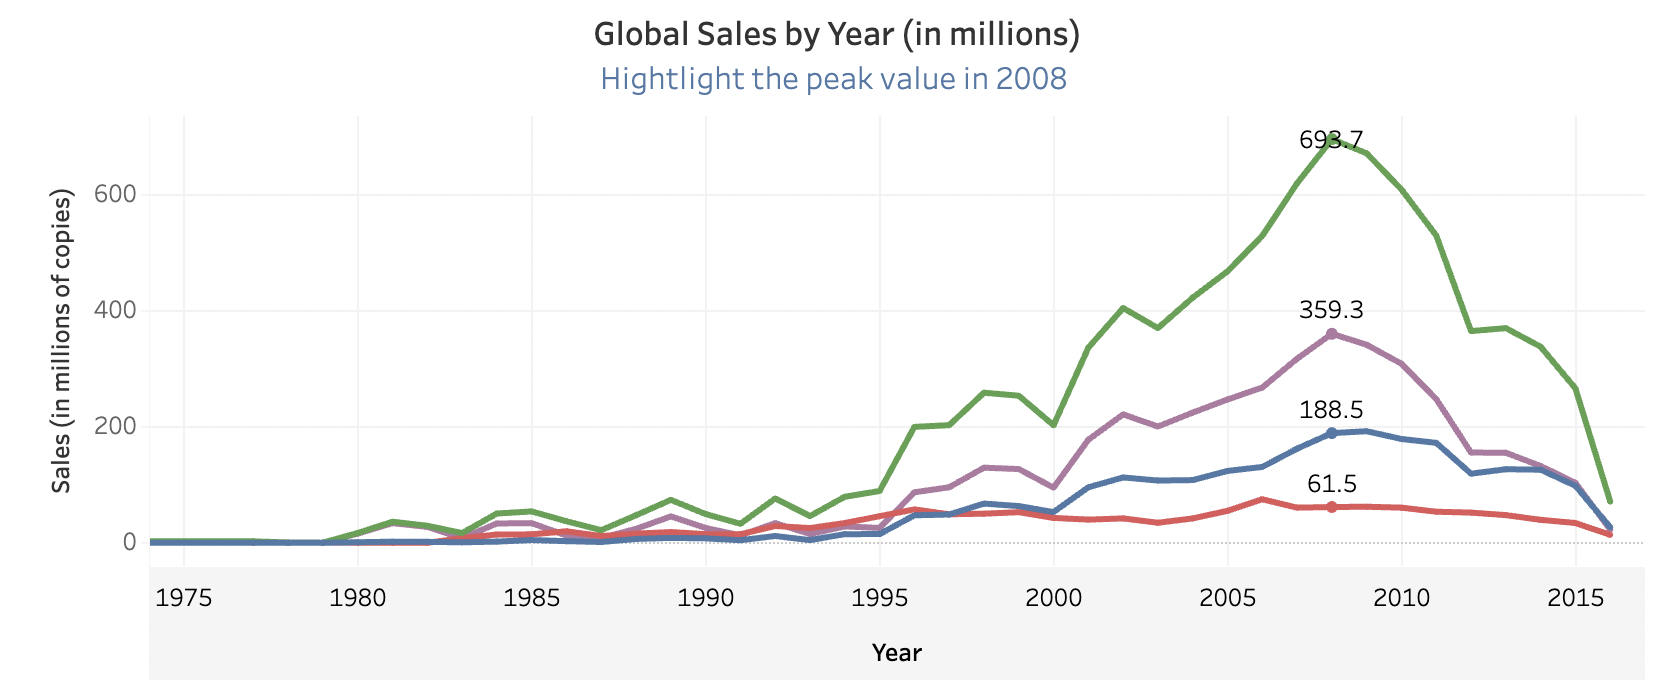

### 4.2 Which publishers have dominated the market over the years?

In [33]:
%%bigquery
Select 
       Publisher,
       Max(times_on_list) as times_on_list
       from
(SELECT 
       Year,
       Genre,
       Platform,
       Publisher,
       (ROW_NUMBER() OVER (PARTITION BY Publisher ORDER BY Year)) as times_on_list
FROM `ba775-b7.vgsales.vgsales_cleaned`
Where Publisher Not Like 'N/A' and Publisher Not Like 'Unknown'
GROUP BY Year, Genre, Platform, Publisher
Order BY Year Desc)
GROUP BY Publisher
Order by times_on_list desc
Limit 10

Downloading: 100%|██████████| 10/10 [00:02<00:00,  4.73rows/s]


Publisher  times_on_list
0               Electronic Arts            550
1                    Activision            514
2            Namco Bandai Games            493
3                       Ubisoft            478
4  Konami Digital Entertainment            445
5                          Sega            411
6                      Nintendo            393
7                           THQ            364
8   Sony Computer Entertainment            283
9                        Capcom            263

### 4.3 Which genres have dominated the market over the years?

Action has remained the most popular genre globally since 2001. 

 - Overall, Action and Sports are the two most popular genres according to the data while Role Playing has gained popularity over the recent few years especially in the Japan market
 - North American market seems to be the driving force behind video game sales as it roughly contributes 47% to the global sales of the top genres.
 - Moreover, the competition in the global video games market has gone down over the years which could be attributed to big corporations consolidating their market shares, reducing the number of competitors. 


In [ ]:
%%bigquery
SELECT Genre, Count(DISTINCT Name) AS title_count, Count(DISTINCT Platform) AS platform_count, Count(DISTINCT Publisher) AS publisher_count, SUM(Global_Sales) AS global_sales, SUM (JP_Sales) / SUM (Global_Sales) *100 AS JP_sales_pct, SUM (NA_Sales) / SUM (Global_Sales) *100 AS NA_sales_pct, SUM (EU_Sales) / SUM(Global_Sales) *100 AS EU_sales_pct, SUM(Other_Sales) / sum (Global_Sales) *100 AS other_sales_pct
FROM `ba775-b7.vgsales.vgsales_cleaned`
GROUP BY Genre
ORDER BY title_count DESC

Downloading: 100%|██████████| 12/12 [00:02<00:00,  5.99rows/s]


Genre  title_count  platform_count  publisher_count  global_sales  \
0         Action         1923              24              244       1751.13   
1         Sports         1379              25              175       1330.93   
2           Misc         1327              24              226        809.96   
3   Role-Playing         1218              26              169        927.33   
4      Adventure         1048              26              214        239.04   
5        Shooter          817              25              152       1037.37   
6         Racing          772              25              132        732.04   
7     Simulation          726              23              156        392.20   
8       Fighting          612              24              104        448.91   
9       Platform          589              26              103        831.37   
10      Strategy          584              23              126        175.12   
11        Puzzle          498              22              122        244.57   

    JP_sales_pct  NA_sales_pct  EU_sales_pct  other_sales_pct  
0       9.131247     50.129345     29.980641        10.700519  
1      10.171083     51.343797     28.314787        10.141029  
2      13.304361     50.649415     26.665514         9.299225  
3      37.987556     35.292722     20.279728         6.428132  
4      21.782965     44.260375     26.828146         7.032296  
5       3.690101     56.161254     30.198483         9.899072  
6       7.744112     49.098410     32.565160        10.555434  
7      16.241713     46.738909     28.908720         8.036716  
8      19.458243     49.807311     22.570226         8.170903  
9      15.729459     53.772688     24.252739         6.205420  
10     28.243490     39.230242     25.890818         6.486980  
11     23.432964     50.468169     20.754794         5.131455

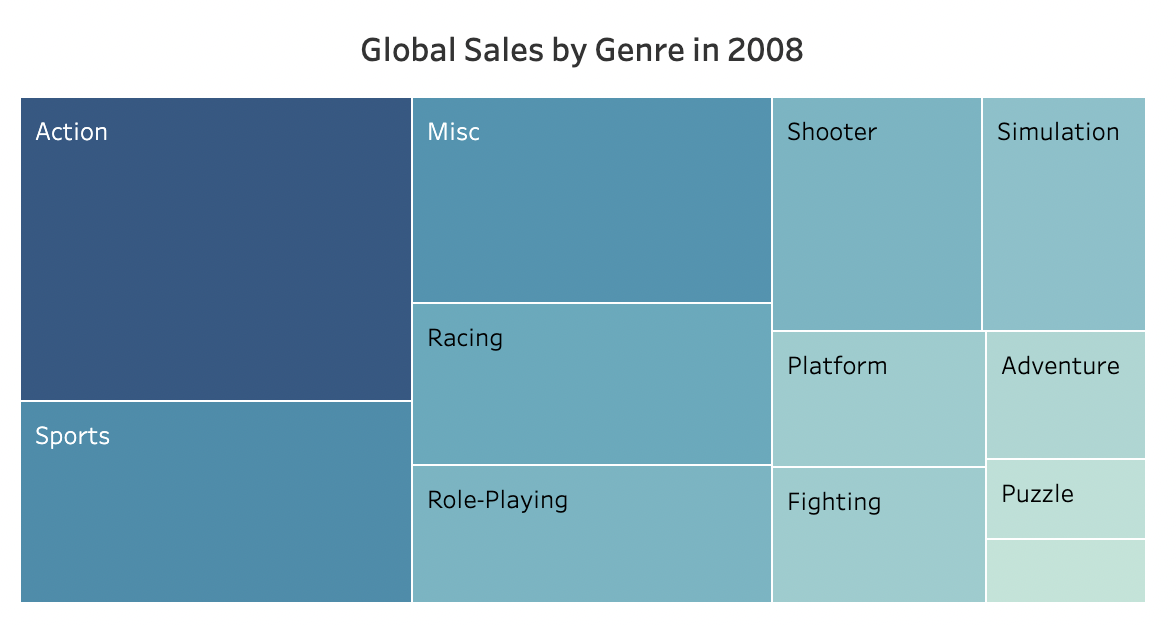

### 4.4 Percentage Market Share of each Genre

Since 2001, Action has consistently been the most popular genre, and this has been reflected by its share of total sales for each year. The percentage share of total video games sales has hovered over 17% consistently every year, and reached a peak of >34% in 2013 before falling to below 30% where it has remained since. 

Shooter games have become more popular over the years in terms of percentage share of total sales, becoming the second most popular game genre for the first time in 2007, and since then their market share has increased, and as of 2016 is slightly below that of Action games at 25.67% vs 28.07%. In the coming years shooter games look set to eclipse action games in terms of popularity. 


In [30]:
%%bigquery
with temp as (
SELECT *
FROM(SELECT Year, Genre, Count(DISTINCT Name) AS title_count, Count(DISTINCT Platform) AS platform_count, Count(DISTINCT Publisher) AS publisher_count, SUM(Global_Sales) AS global_sales
FROM `ba775-b7.vgsales.vgsales_cleaned`
GROUP BY Year,Genre
)
),
temp2 as(
SELECT *, round((global_sales/total_sales)*100,2) as percentage
FROM (select *, sum(global_sales)over(PARTITION BY Year) as total_sales  
FROM temp)
ORDER BY Year DESC, percentage DESC
)

SELECT * FROM (
SELECT *,rank() over(partition by year order by percentage desc) as rank
FROM temp2)
WHERE rank = 1 --or rank = 2 or rank = 3
ORDER BY year DESC
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:02<00:00,  4.67rows/s]


Year   Genre  title_count  platform_count  publisher_count  global_sales  \
0  2016  Action           73               8               34         19.91   
1  2015  Action          150              10               49         70.70   
2  2014  Action           87              11               30         99.02   
3  2013  Action           77              11               30        125.86   
4  2012  Action          184               9               61        122.04   
5  2011  Action          131               9               46        126.30   
6  2010  Action          125               7               44        118.64   
7  2009  Action          144               7               49        139.42   
8  2008  Action          126               7               43        145.10   
9  2007  Action          120              10               43        107.78   

   total_sales  percentage  rank  
0        70.97       28.05     1  
1       265.43       26.64     1  
2       337.06       29.38     1  
3       368.97       34.11     1  
4       363.91       33.54     1  
5       528.11       23.92     1  
6       607.33       19.53     1  
7       669.38       20.83     1  
8       693.72       20.92     1  
9       617.96       17.44     1

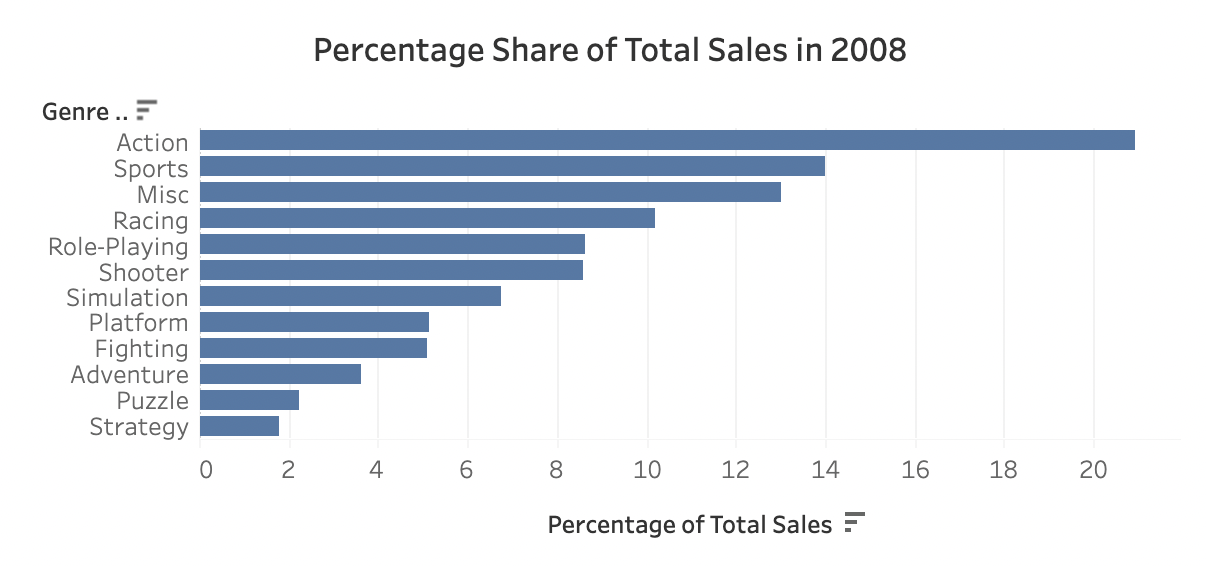

### 4.5 Average Sales of most popular genres over the years

Action has consistently remained the most popular genre over the years globally, however, we have observed a variance in the average sales per action game from year to year. To calculate average sales, we divided global sales in each genre by the number of titles released for that genre. This gave us the number of copies old per game released in each genre. Some key highlights are as follows:

- In 1985, the average sales per title of action games peaked.
- Since 2011, shooter games have had the highest average sales per title, far eclipsing all other genres. 

In [35]:
%%bigquery
with temp as (
SELECT *
FROM(SELECT Year, Genre, Count(DISTINCT Name) AS title_count, Count(DISTINCT Platform) AS platform_count, Count(DISTINCT Publisher) AS publisher_count, SUM(Global_Sales) AS global_sales
FROM `ba775-b7.vgsales.vgsales_cleaned`
GROUP BY Year,Genre
)
),
temp2 as(
SELECT *, round((global_sales/total_sales)*100,2) as percentage
FROM (select *, sum(global_sales)over(PARTITION BY Year) as total_sales  
FROM temp)
ORDER BY Year DESC, percentage DESC
)
--temp3 AS(
--SELECT *, round(global_sales/title_count,2) AS average_sales
--FROM (select *, sum(global_sales)over(PARTITION BY Year) as total_sales  
--FROM temp)
--)
SELECT * , round(global_sales/title_count,2) AS average_sales_in_millions from (
SELECT *,rank() over(partition by year order by percentage desc) as rank
FROM temp2)
ORDER BY year desc 
LIMIT 10

Downloading: 100%|██████████| 10/10 [00:02<00:00,  4.43rows/s]


Year         Genre  title_count  platform_count  publisher_count  \
0  2016      Strategy            9               4                7   
1  2016     Adventure           28               7               20   
2  2016  Role-Playing           26               6               15   
3  2016        Racing            9               3                8   
4  2016      Fighting            9               7                5   
5  2016        Action           73               8               34   
6  2016       Shooter           15               6               11   
7  2016          Misc           12               5                7   
8  2016      Platform            5               5                5   
9  2016        Sports           15               6                9   

   global_sales  total_sales  percentage  rank  average_sales_in_millions  
0          0.54        70.97        0.76    10                       0.06  
1          1.81        70.97        2.55     7                       0.06  
2          6.76        70.97        9.53     4                       0.26  
3          1.64        70.97        2.31     8                       0.18  
4          3.86        70.97        5.44     5                       0.43  
5         19.91        70.97       28.05     1                       0.27  
6         18.22        70.97       25.67     2                       1.21  
7          1.17        70.97        1.65     9                       0.10  
8          2.07        70.97        2.92     6                       0.41  
9         14.60        70.97       20.57     3                       0.97

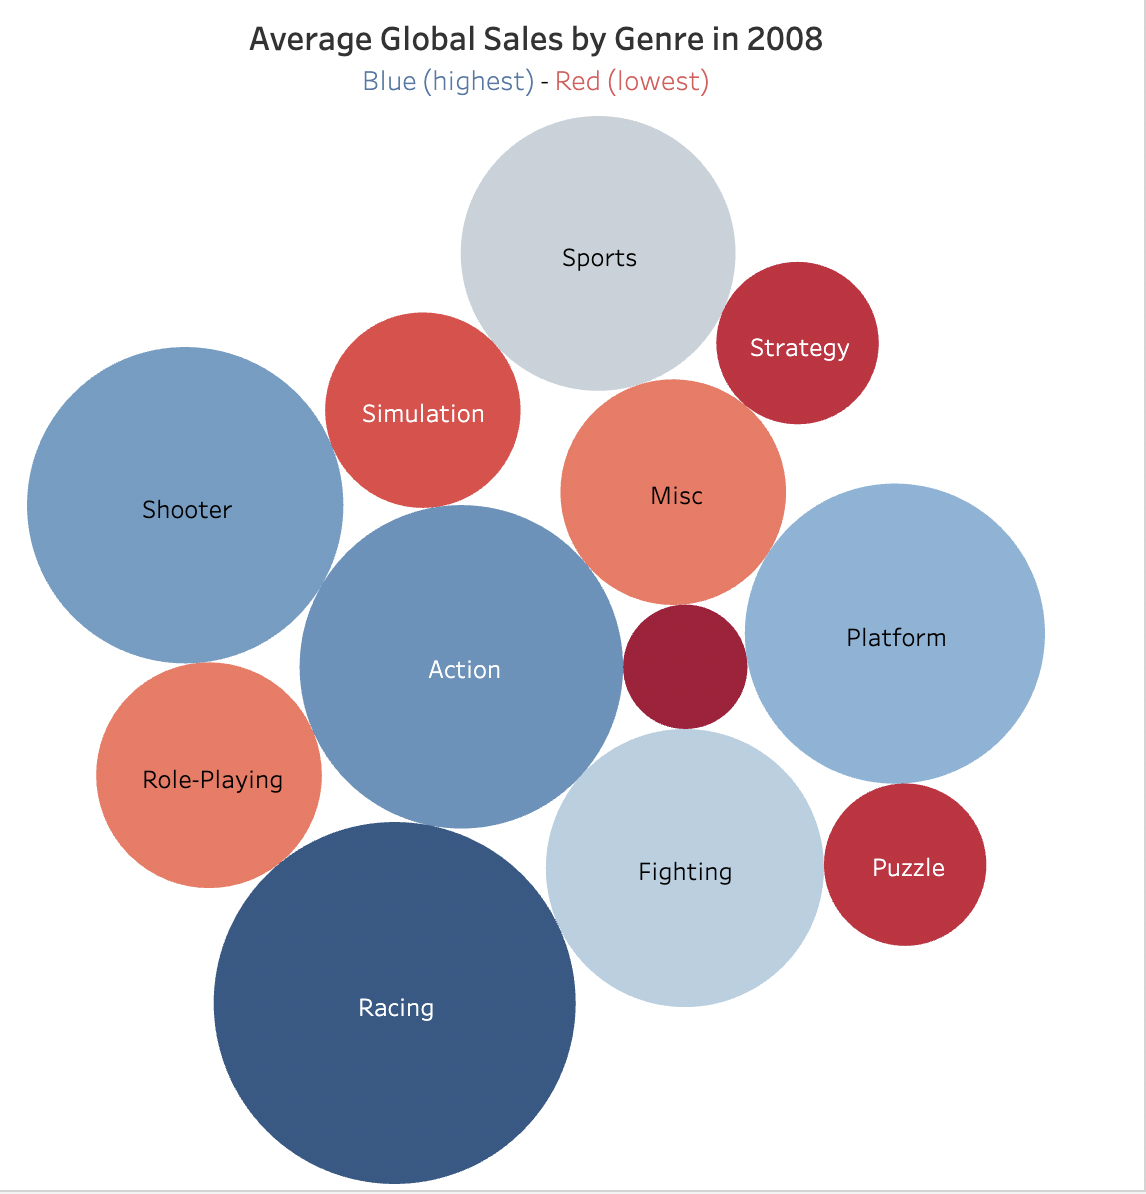

### 5. Q2: What Genre and Platform of The Game Should We Invest In NA Region?


To find out which game genre and platform would be best to invest in, we first need to find out which game genre is the most popular over the years, and further, calculate its average sales and the number of games that were published during the last few years to determine if this game genre is a potential candidate worth publishing in 2017. 

Based on our analysis, we conclude that **Publishing Shooter genre games on the PS4 will be a good strategy to execute in 2017.** The details of our analysis are demonstrated below.  
 


#### 5.1 Top Genre by Sales in North America

This query displays the top video game genre by year in NA.  

We find that:
* Action games dominated the market from in NA 2007-2014, and Shooter games surpassed them from 2015 onwards.

* In 2015, even though the numbers of shooter games in NA only accounted for 2.20% of all games produced, they accounted for 29.86% of total sales in the market; in other words, **even though comparitively fewer shooter games are produced, they actually make the highest number of overall sales in North America**.

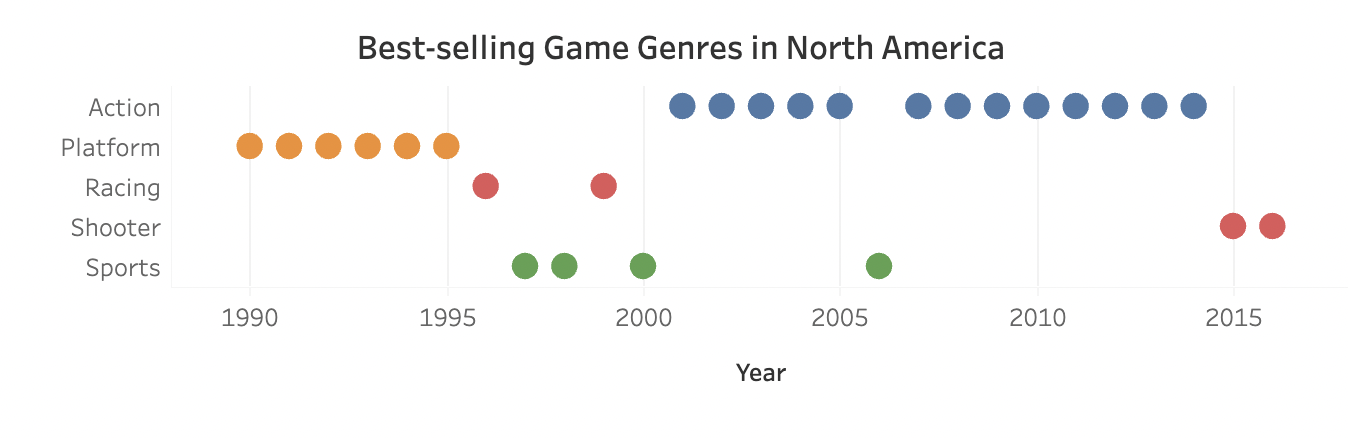
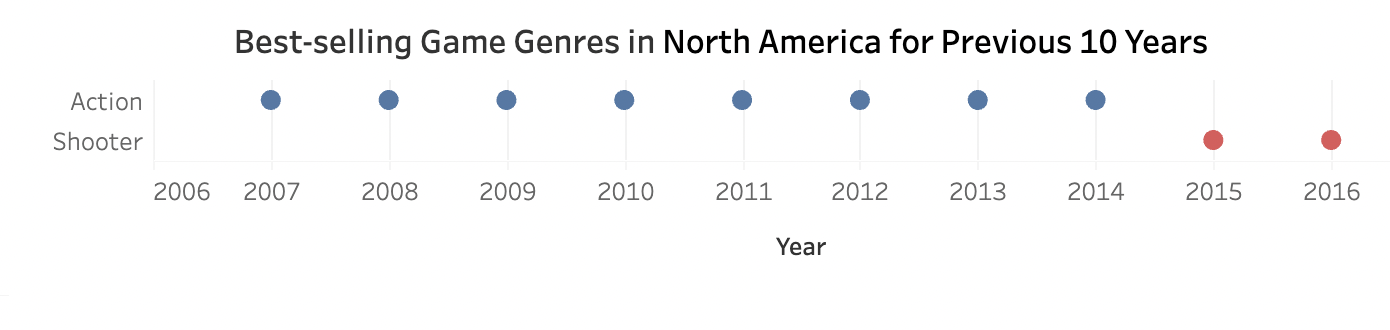
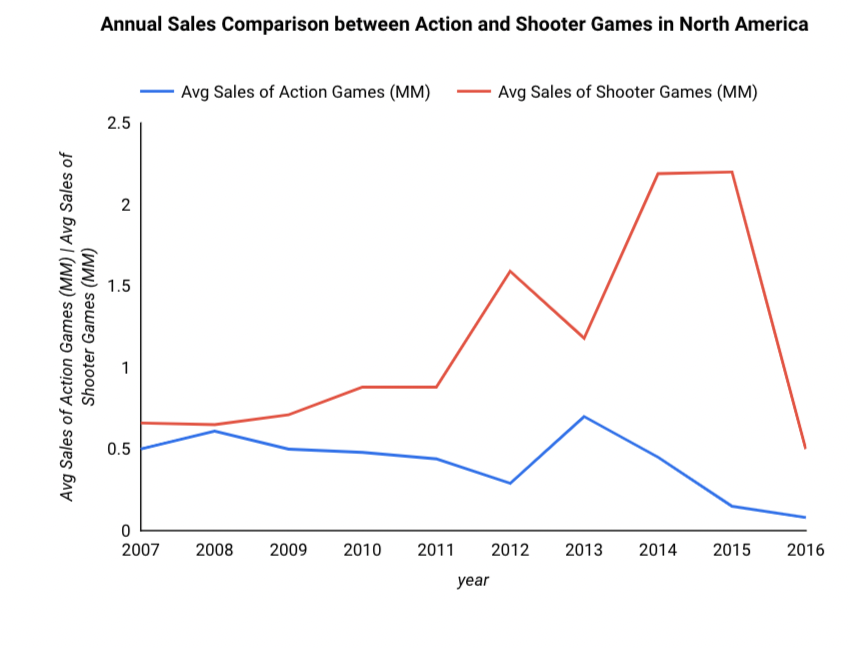

**Columns in the query**:
* Year - Year released
* Genre - Genre of the game
* Sales_NA_Gr - Number of Sales in NA region(in millions)
* Avg_Sales_NA_Gr - Average Sales in NA region(in millions)
* Percentage_of_Game_Published - Percentage of corresponding game published in the market
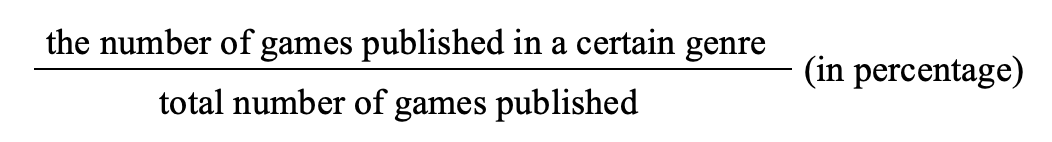
* Percentage_of_Game_Copies_Sold - Percentage of corresponding game sold in the market
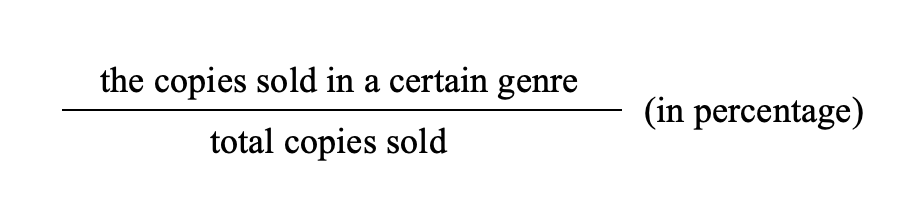

In [9]:
%%bigquery
-- A CTE is set up where we calculated game sales and the number of games for each genre in each year in North America
 WITH 
 sub_gr1 AS (
 SELECT Year, Genre, ROUND(SUM(NA_Sales),2) AS Sales_NA_Gr, COUNT(DISTINCT Name) AS Count_NA_Gr
 FROM `ba775-b7.vgsales.vgsales_cleaned`
 GROUP BY Year, Genre),

-- A second CTE is set up to calculate total game sales and total number of games in each year in North America
 sub2_gr1 AS (
 SELECT Year, Genre, Sales_NA_Gr, Total_Sales_Year_NA, Count_NA_Gr,Total_Count_Year_NA FROM (
  SELECT *, RANK() OVER(PARTITION BY Year ORDER BY sales_na_gr DESC) AS rank,
            SUM(sales_na_gr) OVER (PARTITION BY Year) as Total_Sales_Year_NA,
            SUM(count_na_gr) OVER(PARTITION BY Year) AS Total_Count_Year_NA
  FROM sub_gr1)
 WHERE rank=1
 ORDER BY Year DESC, Sales_NA_Gr DESC)

-- We display North the sales of the best seller genre in each year, the average sales of games of the best seller genre in each year, the percentage of games sold within the best seller genre in each year, and the percentage of best seller genre sales in each year
 SELECT Year, Genre, Sales_NA_Gr, ROUND(Sales_NA_Gr/Count_NA_Gr,2) AS Avg_Sales_NA_Gr,
    CONCAT(ROUND((Count_NA_Gr/Total_Count_Year_NA*100),2),'%') AS Percentage_of_Game_Published,
    CASE WHEN sales_na_gr = 0.0 THEN CONCAT(0.0,'%')
    ELSE CONCAT(ROUND((Sales_NA_Gr/Total_Sales_Year_NA *100),2),'%')  END AS Percentage_of_Game_Copies_Sold
 FROM sub2_gr1
 ORDER BY year DESC
 LIMIT 17;



Downloading: 100%|██████████| 17/17 [00:02<00:00,  6.67rows/s]


Year    Genre  Sales_NA_Gr  Avg_Sales_NA_Gr Percentage_of_Game_Published  \
0   2016  Shooter         7.44             0.50                        7.14%   
1   2015  Shooter        30.79             2.20                        3.83%   
2   2014   Action        38.73             0.45                       27.27%   
3   2013   Action        53.87             0.70                       22.85%   
4   2012   Action        52.51             0.29                       40.53%   
5   2011   Action        57.39             0.44                       16.38%   
6   2010   Action        60.47             0.48                       13.62%   
7   2009   Action        71.67             0.50                       14.12%   
8   2008   Action        77.30             0.61                          12%   
9   2007   Action        59.53             0.50                       13.41%   
10  2006   Sports        74.44             0.98                        9.67%   
11  2005   Action        50.32             0.45                       16.74%   
12  2004   Action        39.11             0.48                       14.72%   
13  2003   Action        37.78             0.41                       16.79%   
14  2002   Action        49.29             0.51                       15.18%   
15  2001   Action        29.91             0.49                       14.09%   
16  2000   Sports        22.75             0.32                       21.71%   

   Percentage_of_Game_Copies_Sold  
0                          32.83%  
1                          29.86%  
2                          29.35%  
3                          34.79%  
4                          33.86%  
5                          23.23%  
6                          19.65%  
7                          21.05%  
8                          21.52%  
9                          18.81%  
10                         27.89%  
11                         20.43%  
12                         17.48%  
13                          18.9%  
14                         22.33%  
15                         16.88%  
16                         23.99%

#### 5.2  Game Genre with Top Average Total Sales Throughout The Timespan in NA

From 5.1, we concluded that shooter games probably will be the potential genre that will give the highest return in terms of number of games, since each year comparitively fewer games were published, but they actually sold pretty well. Now, for this query, we will show the game genre with the top Average Total Sales to further validate our conclusion. 

We find:
* Starting from 2010, there was a small number of shooter games published in the market, but shooter sales did occupy a certain proportion of the market. Eg. In 2016, the published shooter games were 3.83% of the overall titles produced for that year, but the number of sales reached 29.86%. Same as other year that number of published shooter games almost never excess 10%, but the percentage of sales always remains stable at 20% - 30%.Therefore, we can further validate that **There is a shortage of shooter games in the market, and we would like to recommand our client to invest in shooter games for 2017**. 

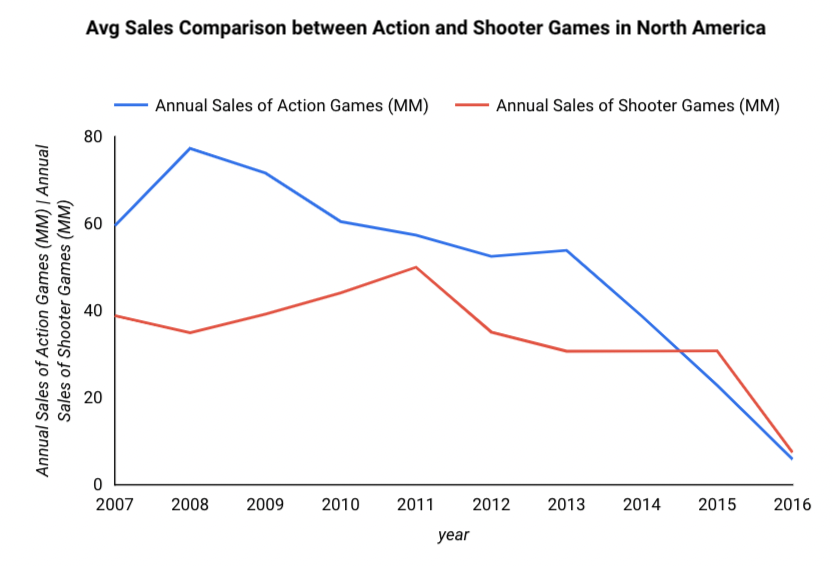
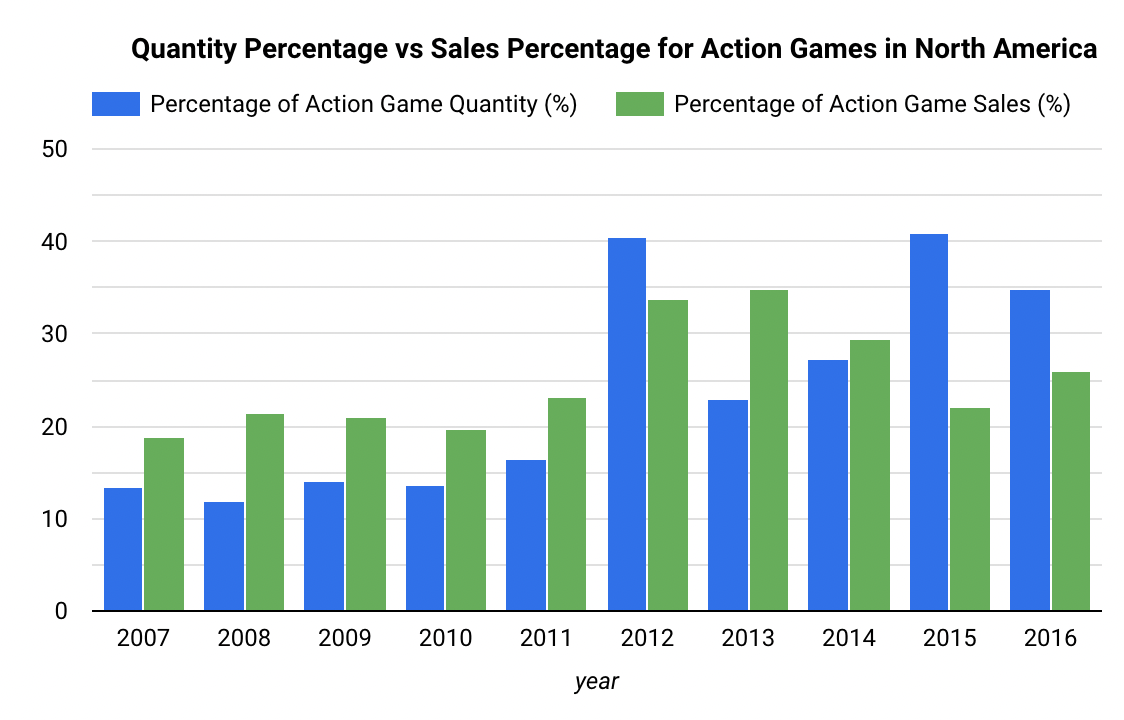
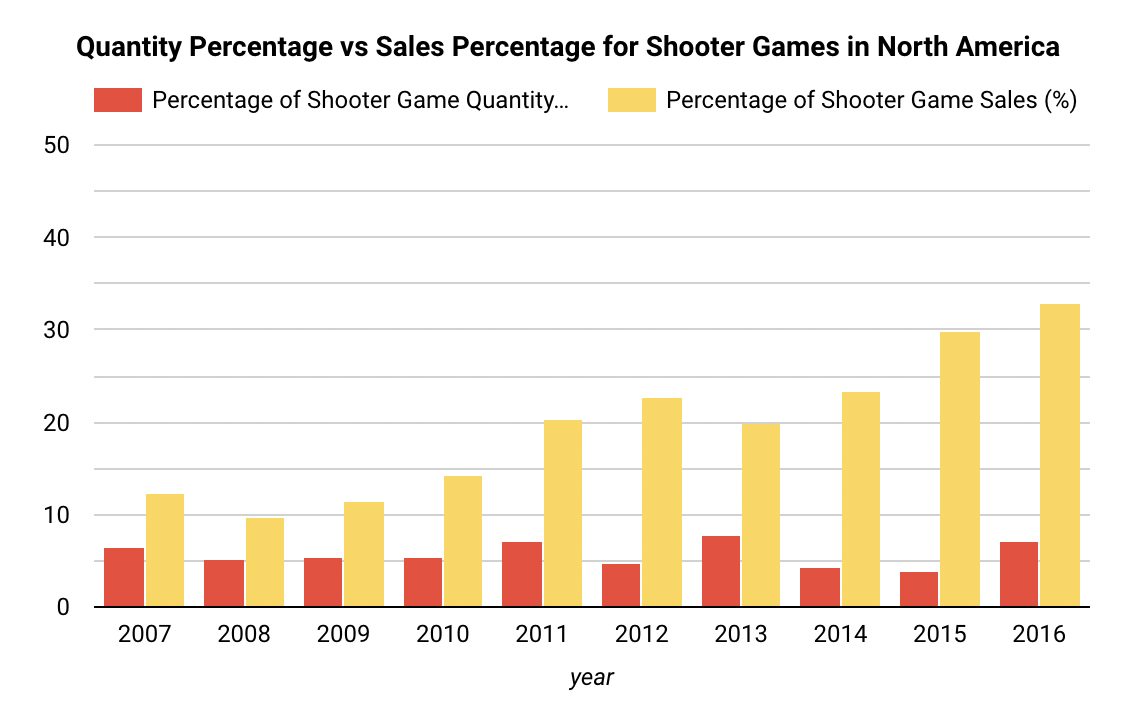

In [10]:
%%bigquery
-- A CTE is set up where we calculated game sales and the number of games for each genre in each year in North America
 WITH 
 sub_gr1 AS (
 SELECT Year, Genre, ROUND(SUM(NA_Sales),2) AS Sales_na_gr, COUNT(DISTINCT Name) AS Count_na_gr
 FROM `ba775-b7.vgsales.vgsales_cleaned`
 GROUP BY Year, Genre),

-- A second CTE is set up to calculate total game sales and total number of games in each year in North America
 sub2_gr1 AS (
 SELECT Year, Genre, Sales_na_gr, Total_sales_year_na, Count_na_gr,Total_count_year_na FROM (
  SELECT *, RANK() OVER(PARTITION BY Year ORDER BY sales_na_gr DESC) AS rank,
            SUM(sales_na_gr) OVER (PARTITION BY Year) as total_sales_year_na,
            SUM(count_na_gr) OVER(PARTITION BY Year) AS total_count_year_na
  FROM sub_gr1)
 ORDER BY Year DESC, sales_na_gr DESC),

-- A third CTE is set up to add a column calculating the average sales per game within the best seller genre in each year
 sub3_gr1 AS (
    SELECT Year, Genre, Sales_na_gr, ROUND(sales_na_gr/count_na_gr,2) AS Avg_sales_na_gr,
    CONCAT(ROUND((count_na_gr/total_count_year_na*100),2),'%') AS Percentage_of_Game_Published,
    CASE WHEN sales_na_gr = 0.0 THEN CONCAT(0.0,'%')
    ELSE CONCAT(ROUND((sales_na_gr/total_sales_year_na *100),2),'%')  END AS Percentage_of_Game_Copies_Sold,
    RANK() OVER(PARTITION BY Year ORDER BY ROUND(sales_na_gr/count_na_gr,2) DESC) AS rank_avg
 FROM sub2_gr1)

-- We display North the sales of the best seller genre in each year, the average sales per game within the best seller genre in each year, the percentage of games sold within the best seller genre in each year, and the percentage of best seller genre sales in each year, ranked by avgerage sales per game
 SELECT Year, Genre, Sales_na_gr as Sales_NA_Gr, Avg_sales_na_gr as Avg_Sales_NA_Gr, Percentage_of_Game_Published, Percentage_of_Game_Copies_Sold
 FROM sub3_gr1
 WHERE rank_avg=1
 ORDER BY year DESC
 LIMIT 15;


Downloading: 100%|██████████| 15/15 [00:01<00:00,  7.81rows/s]


Year       Genre  Sales_NA_Gr  Avg_Sales_NA_Gr  \
0   2016     Shooter         7.44             0.50   
1   2015     Shooter        30.79             2.20   
2   2014     Shooter        30.72             2.19   
3   2013     Shooter        30.70             1.18   
4   2012     Shooter        35.08             1.59   
5   2011     Shooter        49.99             0.88   
6   2010     Shooter        44.11             0.88   
7   2009    Platform        20.30             1.07   
8   2008      Racing        33.54             0.68   
9   2007     Shooter        38.88             0.66   
10  2006      Sports        74.44             0.98   
11  2005  Simulation        19.27             0.66   
12  2004      Sports        38.79             0.63   
13  2004    Platform        26.37             0.63   
14  2003    Platform        25.31             0.49   

   Percentage_of_Game_Published Percentage_of_Game_Copies_Sold  
0                         7.14%                         32.83%  
1                         3.83%                         29.86%  
2                         4.39%                         23.28%  
3                         7.72%                         19.83%  
4                         4.85%                         22.62%  
5                         7.12%                         20.24%  
6                         5.45%                         14.33%  
7                         1.86%                          5.96%  
8                         4.67%                          9.34%  
9                         6.59%                         12.29%  
10                        9.67%                         27.89%  
11                        4.33%                          7.82%  
12                       11.13%                         17.34%  
13                        7.54%                         11.78%  
14                        9.39%                         12.66%

#### 5.3  Top Platorm That Is Worth To Invest in NA
   After we have concluded that the best genre to invest in is shooter games, we will then help our client to analyze which platform is worth publishing in. 
   This query shows us the most popular platform for each year, and there is an obvious pattern in the table that each platform would dominate the market continuously for 4-5 years, then a new platform would start to supplant the market. 
   
   From the table, we find: 
   * PS4 currently is the most popular platform in NA, which has dominated the market for 3 years, so we can say **publishing the game on the PS4 platform would not be a bad choice for 2017** according to the pattern we observed.


    

In [13]:
%%bigquery
-- We set up a CTE where NA sales are summed up, grouped by year and platform
 WITH sub_pf1 AS 
 (SELECT Year, platform, ROUND(SUM(NA_Sales),2) AS sales_na_pf
 FROM `ba775-b7.vgsales.vgsales_cleaned`
  GROUP BY Year, platform
  ORDER BY Year DESC, sales_na_pf DESC)
-- Using a window function, we ranked all the platforms by sales for each year
SELECT Year, platform as Platform, sales_na_pf as Sales_NA_Pf FROM (
  SELECT *, RANK() OVER(PARTITION BY Year ORDER BY sales_na_pf DESC) AS rank FROM sub_pf1
ORDER BY Year DESC, sub_pf1.sales_na_pf DESC
)
-- To get a clearer picture of how popularity of platforms is trending over time, we selected the top sales platform for each year
WHERE rank=1
ORDER BY Year DESC, sales_na_pf DESC
LIMIT 21;

Downloading: 100%|██████████| 21/21 [00:01<00:00, 11.78rows/s]


Year Platform  Sales_NA_Pf
0   2016      PS4        11.86
1   2015      PS4        40.76
2   2014      PS4        34.09
3   2013     X360        53.13
4   2012     X360        58.39
5   2011     X360        88.71
6   2010     X360       107.58
7   2009      Wii       116.84
8   2008      Wii       103.73
9   2007      Wii        84.54
10  2006      Wii        73.38
11  2005      PS2        87.33
12  2004      PS2        97.07
13  2003      PS2        88.93
14  2002      PS2        98.64
15  2001      PS2        79.68
16  2000       PS        46.10
17  1999       PS        66.57
18  1998       PS        84.03
19  1997       PS        58.06
20  1996       PS        45.42

#### Based on the anlysis above, we would recommand our client to invest in a shooter game on the PS4 Platform for 2017. 

### 6. Q3: If We Want to Join The Asian Market, Any Difference In The Market?

#### 6.1 Game Genre with Top  Total Sales Throughout The Timespan in Japan

 We will use the same logic as NA to find the most popular game in Japan (JP). 
 This query shows the most popular game genre in JP differs from the NA Region. 
 We find :
 * Even Action surpass the Role-Playing, but the Percentage_of_Game_Published almost equal to Percentage_of_Game_Copies_Sold, which means Action game is not performing well relative to the number of titles released. 
   And we will dive in more to see the average sales of both Action and Role Playing. 
 * Role-Playing dominated the market for almost 14 years, and they sold pretty well with a comparitively samller number of titles published in the market. So we would say **role-playing games are worth investing in Japan**. 
  

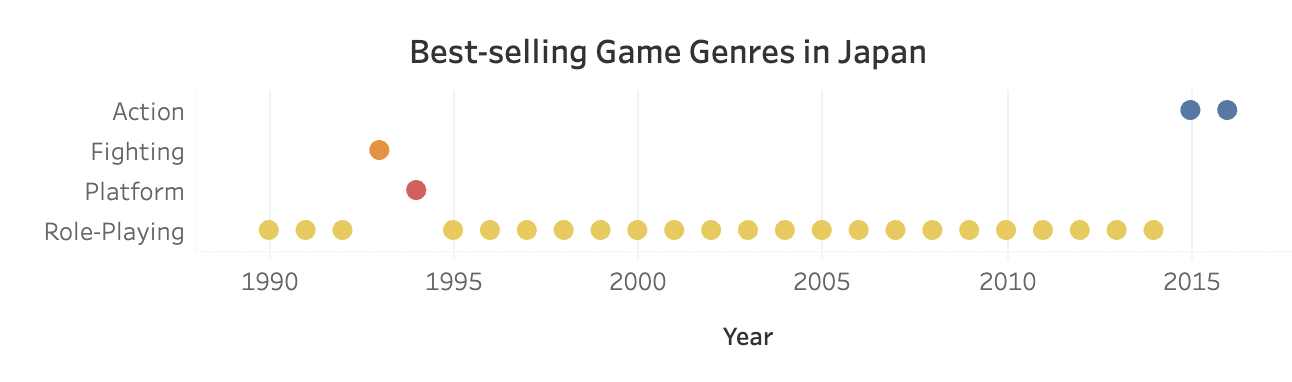

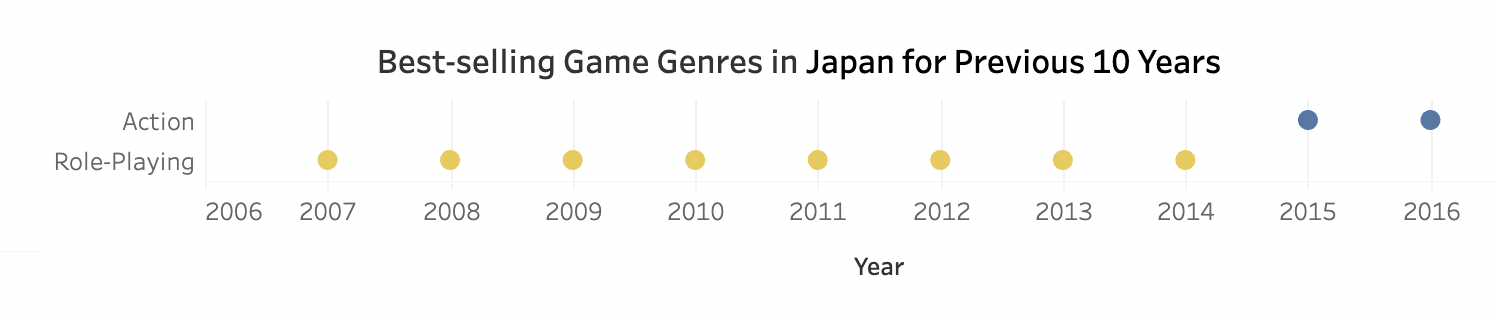
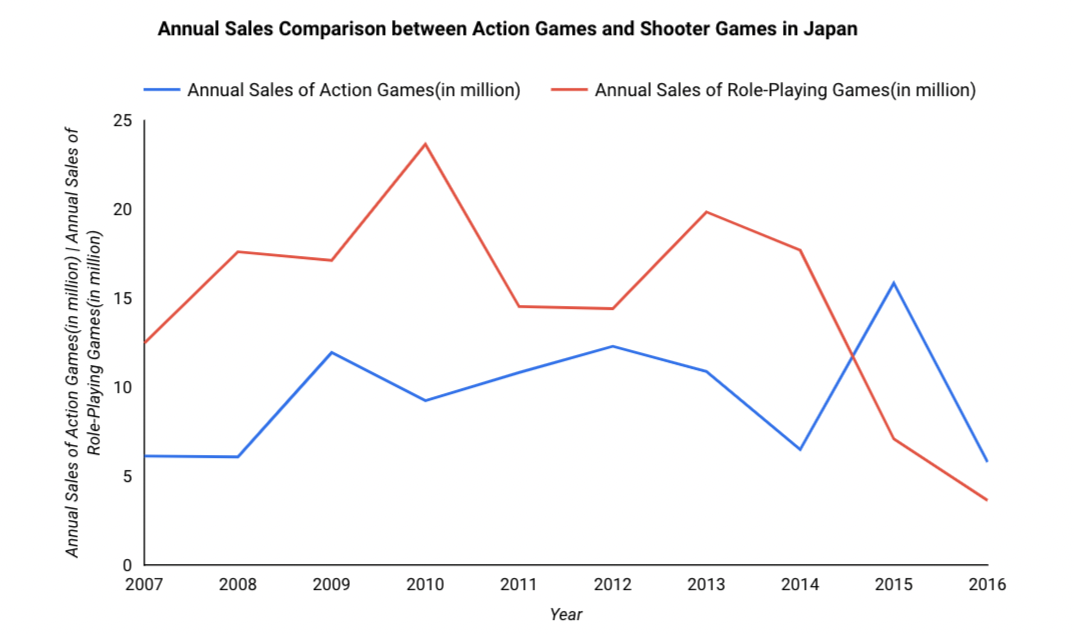
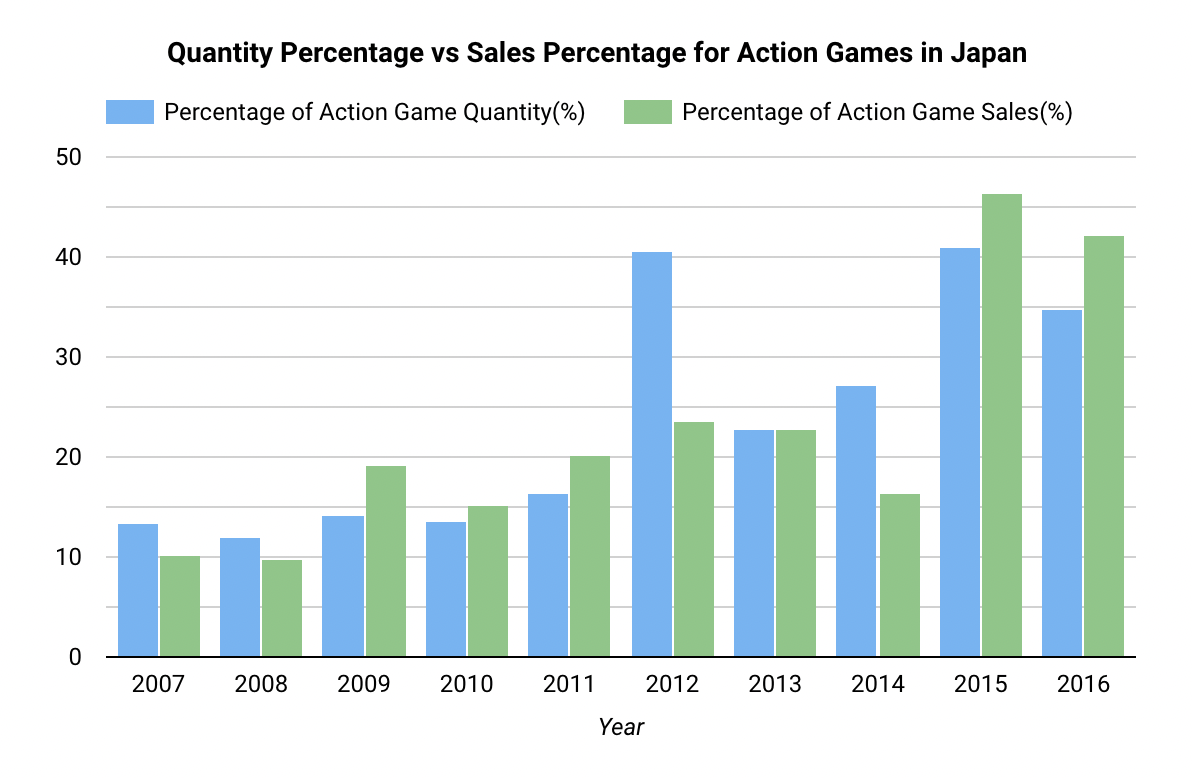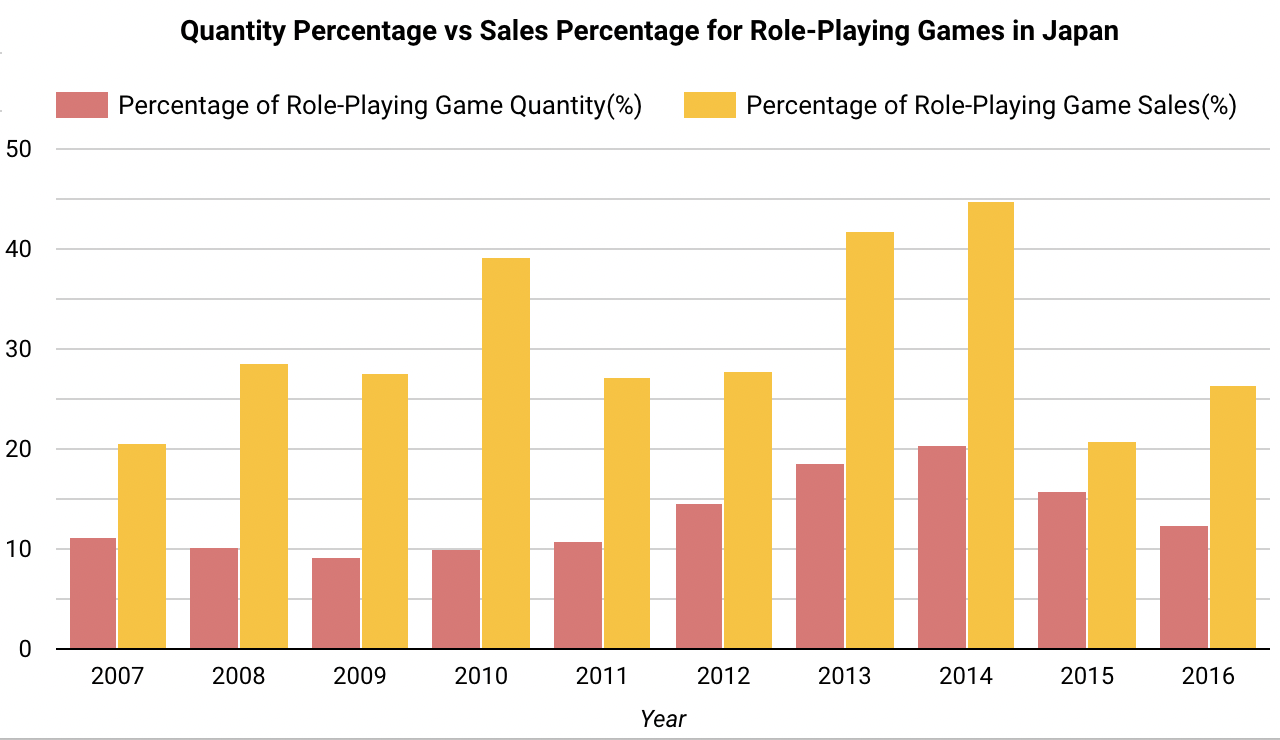

In [36]:
%%bigquery

-- Same query as above executed for the region of JP
 WITH 
 sub_gr2 AS (
 SELECT Year, Genre, ROUND(SUM(JP_Sales),2) AS sales_jp_gr, COUNT(DISTINCT Name) AS count_jp_gr
 FROM `ba775-b7.vgsales.vgsales_cleaned`
 GROUP BY Year, Genre),

 sub2_gr2 AS (
 SELECT Year, Genre, sales_jp_gr, total_sales_year_jp, count_jp_gr,total_count_year_jp FROM (
  SELECT *, RANK() OVER(PARTITION BY Year ORDER BY sales_jp_gr DESC) AS rank,
           SUM(sales_jp_gr) OVER (PARTITION BY Year) as total_sales_year_jp,
           SUM(count_jp_gr) OVER(PARTITION BY Year) AS total_count_year_jp
  FROM sub_gr2)
 WHERE rank=1
 ORDER BY Year DESC, sales_jp_gr DESC)

 SELECT year as Year, Genre, sales_jp_gr as Sales_JP_Gr , ROUND(sales_jp_gr/count_jp_gr,2) AS Avg_Sales_JP_Gr,
     CONCAT(ROUND((count_jp_gr/total_count_year_jp*100),2),'%') AS Percentage_of_Game_Published,
     CASE WHEN sales_jp_gr = 0.0 THEN CONCAT(0.0,'%')
     ELSE CONCAT(ROUND((sales_jp_gr/total_sales_year_jp *100),2),'%')  END AS Percentage_of_Game_Copies_Sold
 FROM sub2_gr2
 ORDER BY year DESC
 LIMIT 15;

Downloading: 100%|██████████| 15/15 [00:02<00:00,  6.85rows/s]


Year         Genre  Sales_JP_Gr  Avg_Sales_JP_Gr  \
0   2016        Action         5.79             0.08   
1   2015        Action        15.85             0.11   
2   2014  Role-Playing        17.71             0.27   
3   2013  Role-Playing        19.86             0.32   
4   2012  Role-Playing        14.42             0.22   
5   2011  Role-Playing        14.54             0.17   
6   2010  Role-Playing        23.67             0.26   
7   2009  Role-Playing        17.14             0.18   
8   2008  Role-Playing        17.62             0.16   
9   2007  Role-Playing        12.48             0.12   
10  2006  Role-Playing        20.46             0.20   
11  2005  Role-Playing         9.31             0.14   
12  2004  Role-Playing        13.49             0.26   
13  2003  Role-Playing         9.74             0.20   
14  2002  Role-Playing        13.79             0.25   

   Percentage_of_Game_Published Percentage_of_Game_Copies_Sold  
0                        34.76%                         42.26%  
1                        40.98%                         46.48%  
2                        20.38%                         44.88%  
3                        18.69%                         41.73%  
4                        14.54%                         27.79%  
5                        10.75%                          27.2%  
6                         9.91%                         39.17%  
7                         9.22%                         27.64%  
8                        10.29%                         28.63%  
9                        11.17%                         20.65%  
10                        13.1%                         27.35%  
11                        9.87%                         16.93%  
12                        9.34%                         32.18%  
13                        8.66%                         28.24%  
14                        8.61%                         32.87%

#### 6.2 Game Genre with Top Average Total Sales Throughout The Timespan in JP

This query shows us an obvious pattern that Role-Playing dominates the market for quite a long time, even though there are other genres of games that surpass it for a couple of years, Role-Playing is always the one with the most sales. And **Role-Playing Games always occupy a small proportion of number of titles released in JP, but with great sales performance**.
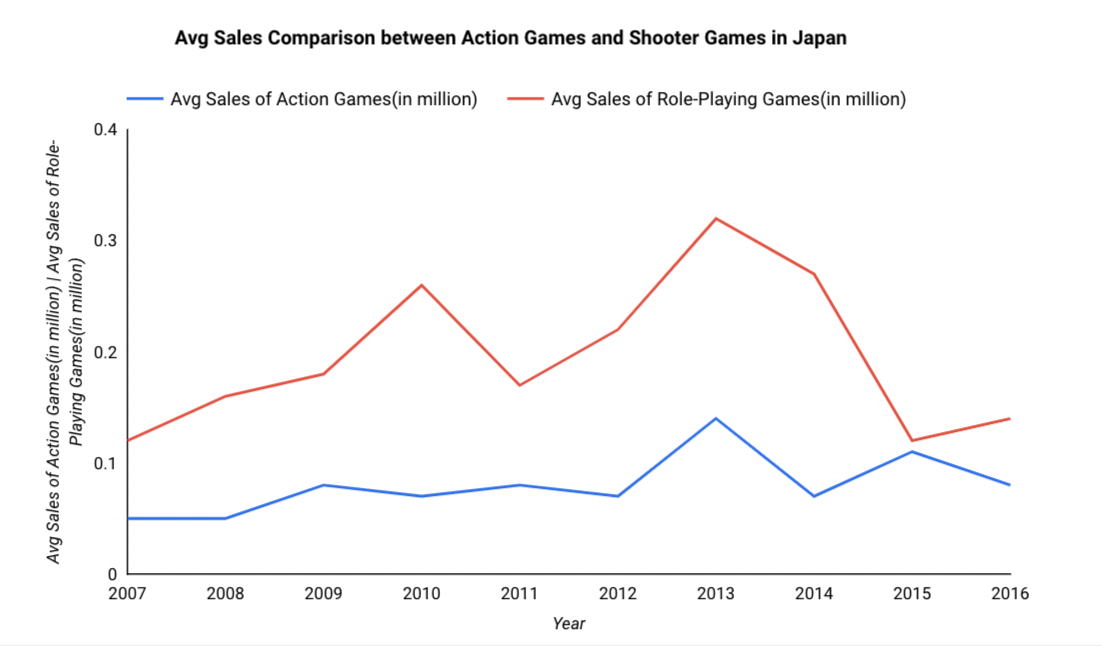

In [37]:
%%bigquery 
-- A CTE is set up where we calculated game sales and the number of games for each genre in each year in Japan
 WITH 
 sub_gr1 AS (
 SELECT Year, Genre, ROUND(SUM(JP_Sales),2) AS sales_jp_gr, COUNT(DISTINCT Name) AS count_jp_gr
 FROM `ba775-b7.vgsales.vgsales_cleaned`
 GROUP BY Year, Genre),

-- A second CTE is set up to calculate total game sales and total number of games in each year in Japan
 sub2_gr1 AS (
 SELECT Year, Genre, Sales_JP_gr, total_sales_year_jp, count_jp_gr,total_count_year_jp FROM (
  SELECT *, RANK() OVER(PARTITION BY Year ORDER BY sales_jp_gr DESC) AS rank,
            SUM(sales_jp_gr) OVER (PARTITION BY Year) as total_sales_year_jp,
            SUM(count_jp_gr) OVER(PARTITION BY Year) AS total_count_year_jp
  FROM sub_gr1)
 ORDER BY Year DESC, sales_jp_gr DESC),

-- A third CTE is set up to add a column calculating the average sales per game within the best seller genre in each year
 sub3_gr1 AS (
    SELECT year, Genre, sales_jp_gr, ROUND(sales_jp_gr/count_jp_gr,2) AS avg_sales_jp_gr,
    CONCAT(ROUND((count_jp_gr/total_count_year_jp*100),2),'%') AS percentage_count,
    CASE WHEN sales_jp_gr = 0.0 THEN CONCAT(0.0,'%')
    ELSE CONCAT(ROUND((sales_jp_gr/total_sales_year_jp *100),2),'%')  END AS percentage_sales,
    RANK() OVER(PARTITION BY Year ORDER BY ROUND(sales_jp_gr/count_jp_gr,2) DESC) AS rank_avg
 FROM sub2_gr1)

-- We display for the region of Japan the sales of the best seller genre in each year, the average sales per game within the best seller genre in each year, the percentage of games sold within the best seller genre in each year, and the percentage of best seller genre sales in each year, ranked by avgerage sales per game
 SELECT year as Year, Genre, sales_jp_gr as Sales_JP_Gr, avg_sales_jp_gr as Avg_Sales_JP_Gr, percentage_count as Percentage_Count, percentage_sales as Percentage_Sales
 FROM sub3_gr1
 WHERE rank_avg=1
 ORDER BY year DESC
 LIMIT 15;


Downloading: 100%|██████████| 15/15 [00:02<00:00,  6.68rows/s]


Year         Genre  Sales_JP_Gr  Avg_Sales_JP_Gr Percentage_Count  \
0   2016  Role-Playing         3.63             0.14           12.38%   
1   2015       Shooter         2.69             0.19            3.83%   
2   2014      Fighting         4.80             0.34            4.39%   
3   2013  Role-Playing        19.86             0.32           18.69%   
4   2012    Simulation         5.86             0.39             3.3%   
5   2011  Role-Playing        14.54             0.17           10.75%   
6   2010  Role-Playing        23.67             0.26            9.91%   
7   2009      Platform         4.84             0.25            1.86%   
8   2008  Role-Playing        17.62             0.16           10.29%   
9   2007  Role-Playing        12.48             0.12           11.17%   
10  2006      Platform         9.33             0.30            3.94%   
11  2005    Simulation         9.02             0.31            4.33%   
12  2004  Role-Playing        13.49             0.26            9.34%   
13  2003  Role-Playing         9.74             0.20            8.66%   
14  2002  Role-Playing        13.79             0.25            8.61%   

   Percentage_Sales  
0             26.5%  
1             7.89%  
2            12.16%  
3            41.73%  
4            11.29%  
5             27.2%  
6            39.17%  
7              7.8%  
8            28.63%  
9            20.65%  
10           12.47%  
11            16.4%  
12           32.18%  
13           28.24%  
14           32.87%

#### 6.3 Top Platform That Is Worth Investing in JP

There is an obvious patter for the platform trend in JP. The Nintendo DS and 3DS Platform dominates the market almost continously from 2005 to 2016, but the exact platform fluctuates every year. 
We found:
* There is a lifecycle for each platform, usually their popularity will last for 4-5 years, and then will start to descend.
* 3DS Platform keeps welcomed from 2012 to 2015, but start to decline in 2016. Therefore, we **recommend that our client publish their game on the 3DS Platform in 2017, or any future Nintendo platform released due to the preference for the company in Japan**. 
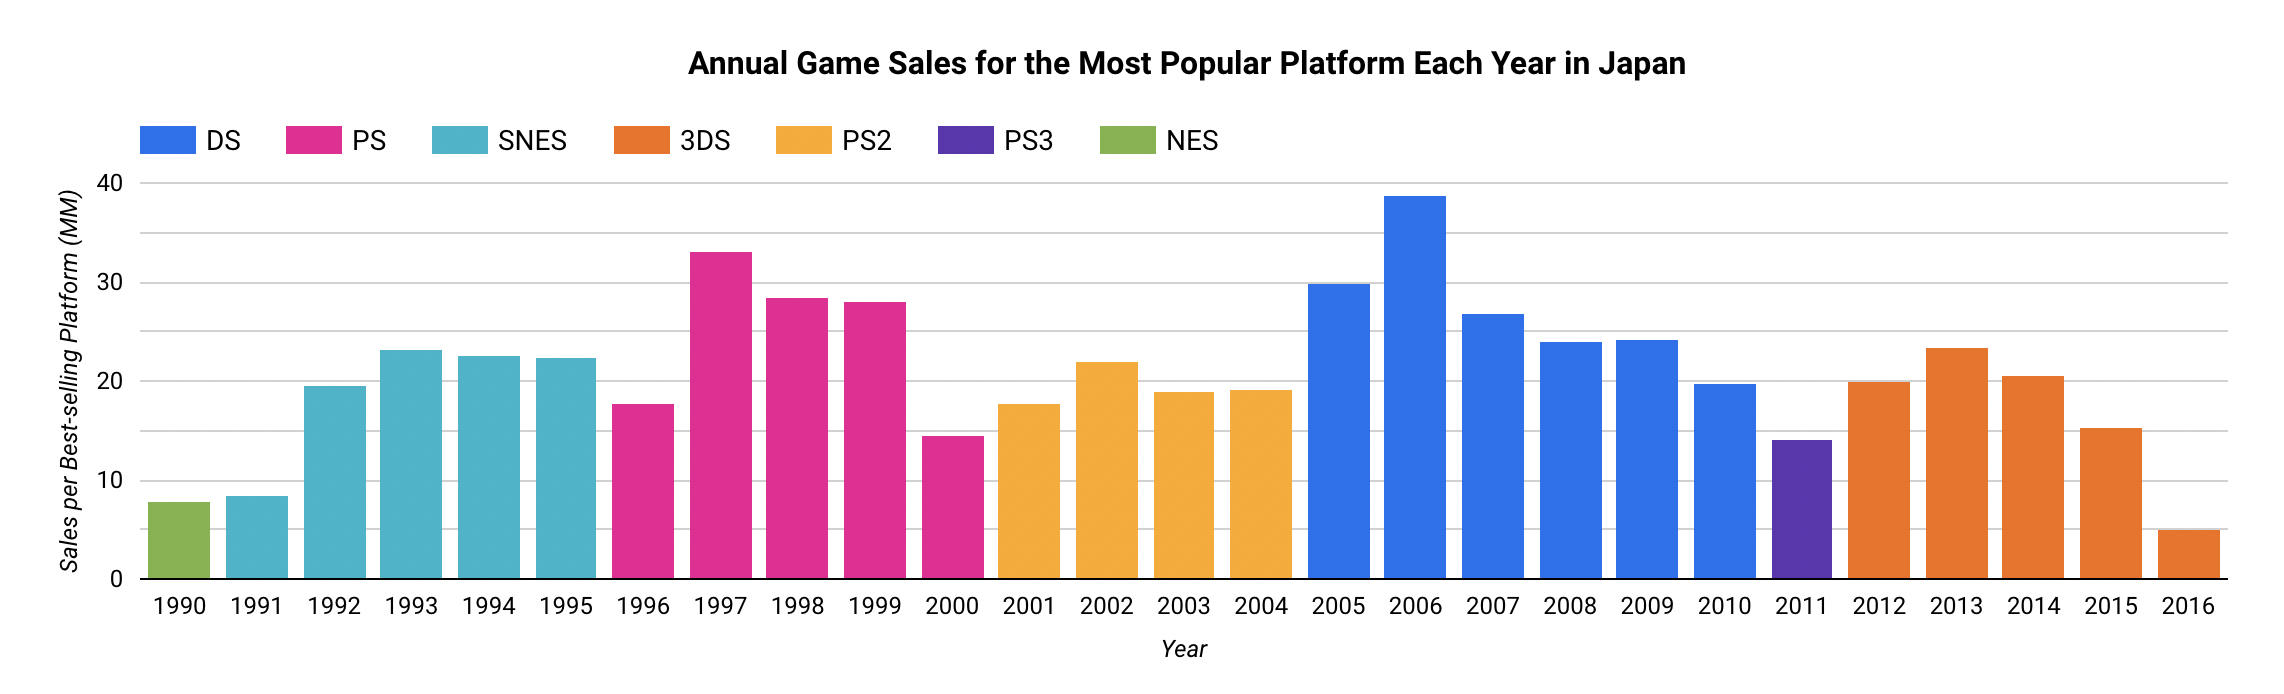

In [21]:
%%bigquery
-- Same query as above executed for the region of JP
 WITH sub_pf3 AS 
 (SELECT Year, platform, ROUND(SUM(JP_Sales),2) AS sales_jp_pf
 FROM `ba775-b7.vgsales.vgsales_cleaned`
  GROUP BY Year, platform
  ORDER BY Year DESC, sales_jp_pf DESC)
SELECT Year, platform as Platform, sales_jp_pf as Sales_JP_Pf FROM (
  SELECT *, RANK() OVER(PARTITION BY Year ORDER BY sales_jp_pf DESC) AS rank FROM sub_pf3
ORDER BY Year DESC, sub_pf3.sales_jp_pf DESC
)
WHERE rank=1
ORDER BY Year DESC, sales_jp_pf DESC
LIMIT 13;

Downloading: 100%|██████████| 13/13 [00:03<00:00,  4.06rows/s]


Year Platform  Sales_JP_Pf
0   2016      3DS         5.03
1   2015      3DS        15.39
2   2014      3DS        20.64
3   2013      3DS        23.52
4   2012      3DS        19.95
5   2011      PS3        14.14
6   2010       DS        19.86
7   2009       DS        24.28
8   2008       DS        24.11
9   2007       DS        26.90
10  2006       DS        38.72
11  2005       DS        29.95
12  2004      PS2        19.17

#### Therefore, we will suggest our clinet to invest Role-Playing Game in JP, and publish on the latest Nintendo Platform which is released (currently the 3DS). 

### **7. Suggestions**

* 2010 onwards, Shooter games have had the highest average sales per title globally, which correlates to our conclusion from the regional analysis as same trend is being observed in the North America region, which is the biggest contributor to the global market.
* In case the client wants to target a specific market, Role Playing Games on the Nintendo 3DS would be the ideal choice  for Japan while Shooter Games on the PS4 would be the best area to focus on for North America
* Based on these trends, in the coming years, we could predict that shooter games will also likely become the largest genre in terms of percentage share of sales globally, thus this provides another reason to invest in them. 


### **8. Conclusion**

The video games industry has seen interesting changes over the past few decades as it has not only evolved from simpler platforms like Atari 2600 to much more complex machines like the Playstation 4. The overall market has peaked in 2008 as more titles were released, however, the number of publishers has gone down in recent years due to big corporations increasingly dominating the market. Nonetheless, North America is the biggest market that drives global sales forward which is why it has dominated the market trends for the video game industry over time. Action games have always been predominantly popular globally, however, Shooter games have started to pick up momentum with time and could easily overtake the Action genre globally in a couple of years at this rate. For newer players in the market, the best course of action would be to enter the shooter market on the Sony PS4. However, if an organization intends to target the Japanese market specifically, it must focus on the role playing genre built on the Nintendo platform as such games have done well in recent times in the country. 

### **9. Resources**

* Quartile SQL code inspired from: https://dataschool.com/how-to-teach-people-sql/how-to-find-outliers-with-sql/
* Identifing first-time-on-list publisher SQL code inspired from: https://stackoverflow.com/questions/38726124/t-sql-identify-first-time-value-appears-in-column
* https://www.inc.com/marc-emmer/95-percent-of-new-products-fail-here-are-6-steps-to-make-sure-yours-dont.html
* https://en.wikipedia.org/wiki/Video_game_crash_of_1983
* https://advanced-television.com/2022/10/11/survey-video-game-piracy-set-to-rise/advanced-television.comadvanced
* https://www.pocketgamer.biz/data-and-research/79258/more-than-half-of-all-games-revenue-this-year-will-come-from-mobile/